# **Credit Card Fraud Detection**

***Context***  
เป็นสิ่งสำคัญที่บริษัทบัตรเครดิตจะต้องสามารถรับรู้ธุรกรรมบัตรเครดิตที่เป็นการฉ้อโกง เพื่อที่ลูกค้าจะไม่ถูกเรียกเก็บเงินสำหรับสินค้าที่ไม่ได้ซื้อ  
  
***Content Dataset***  
ชุดข้อมูลประกอบด้วยธุรกรรมของบัตรเครดิตในเดือนกันยายน 2556 โดยผู้ถือบัตรชาวยุโรป  
ชุดข้อมูลนี้แสดงธุรกรรมที่เกิดขึ้นในสองวัน โดยที่เรามีการฉ้อโกง 492 รายการจาก 284,807 รายการ  
ชุดข้อมูลมีความไม่สมดุลอย่างมาก คลาสบวก (การฉ้อโกง) คิดเป็น 0.172% ของธุรกรรมทั้งหมด  
  
มีเฉพาะตัวแปรอินพุตที่เป็นตัวเลขซึ่งเป็นผลมาจากการแปลง PCA
ขออภัย เนื่องจากปัญหาการรักษาความลับ   เราจึงไม่สามารถให้คุณลักษณะดั้งเดิมและข้อมูลพื้นฐานเพิ่มเติมเกี่ยวกับข้อมูลได้  
คุณสมบัติ V1, V2, … V28 เป็นองค์ประกอบหลักที่ได้รับจาก PCA คุณลักษณะเดียวที่ยังไม่ได้แปลงด้วย PCA คือ 'เวลา' และ 'จำนวน'
คุณลักษณะ 'เวลา'   ประกอบด้วยวินาทีที่ผ่านไประหว่างแต่ละธุรกรรมและธุรกรรมแรกในชุดข้อมูล
คุณลักษณะ 'จำนวนเงิน' คือจำนวนธุรกรรม   คุณลักษณะนี้สามารถใช้สำหรับการเรียนรู้ที่คำนึงถึงต้นทุนตามตัวอย่าง
คุณลักษณะ 'คลาส' เป็นตัวแปรการตอบสนองและจะใช้  
**ค่า 1 ในกรณีของการฉ้อโกง**  
**0 อย่างอื่น**    

ด้วยอัตราส่วนความไม่สมดุลของคลาส เราแนะนำให้วัดความแม่นยำโดยใช้พื้นที่ใต้เส้นโค้ง Precision-Recall (AUPRC)  
ความแม่นยำของเมทริกซ์ความสับสนไม่มีความหมายสำหรับการจำแนกประเภทที่ไม่สมดุล  

***อัพเดท (03/05/2021)***  
โปรแกรมจำลองข้อมูลธุรกรรมได้รับการเผยแพร่โดยเป็นส่วนหนึ่งของคู่มือเชิงปฏิบัติเกี่ยวกับการเรียนรู้ของเครื่องสำหรับการตรวจจับการฉ้อโกงบัตรเครดิต - https://fraud-detection-handbook.github.io/fraud detection handbook/Chapter_3_GettingStarted/SimulatedDataset.html
เราขอเชิญผู้ปฏิบัติงานทุกคนที่สนใจในชุดข้อมูลการตรวจจับการฉ้อโกงให้ตรวจสอบโปรแกรมจำลองข้อมูลนี้ และวิธีการตรวจสอบการฉ้อโกงบัตรเครดิตที่นำเสนอในหนังสือ  
  
Refference : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# **Load dataset**

In [ ]:
import pandas_profiling as pdp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline
# Model

# Logistic Regression
# Logistic Regression CV
# Bernoulli Naive Bayes Classifier
# RandomForestClassifier
# BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
# XGBClassifier
# import tensorflow as tf

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# # GPU
# print("Are we using GPU?: ", torch.cuda.is_available())
# print("the GPU name is: ",torch.cuda.get_device_name(0))

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Fraud detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **EDA**

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

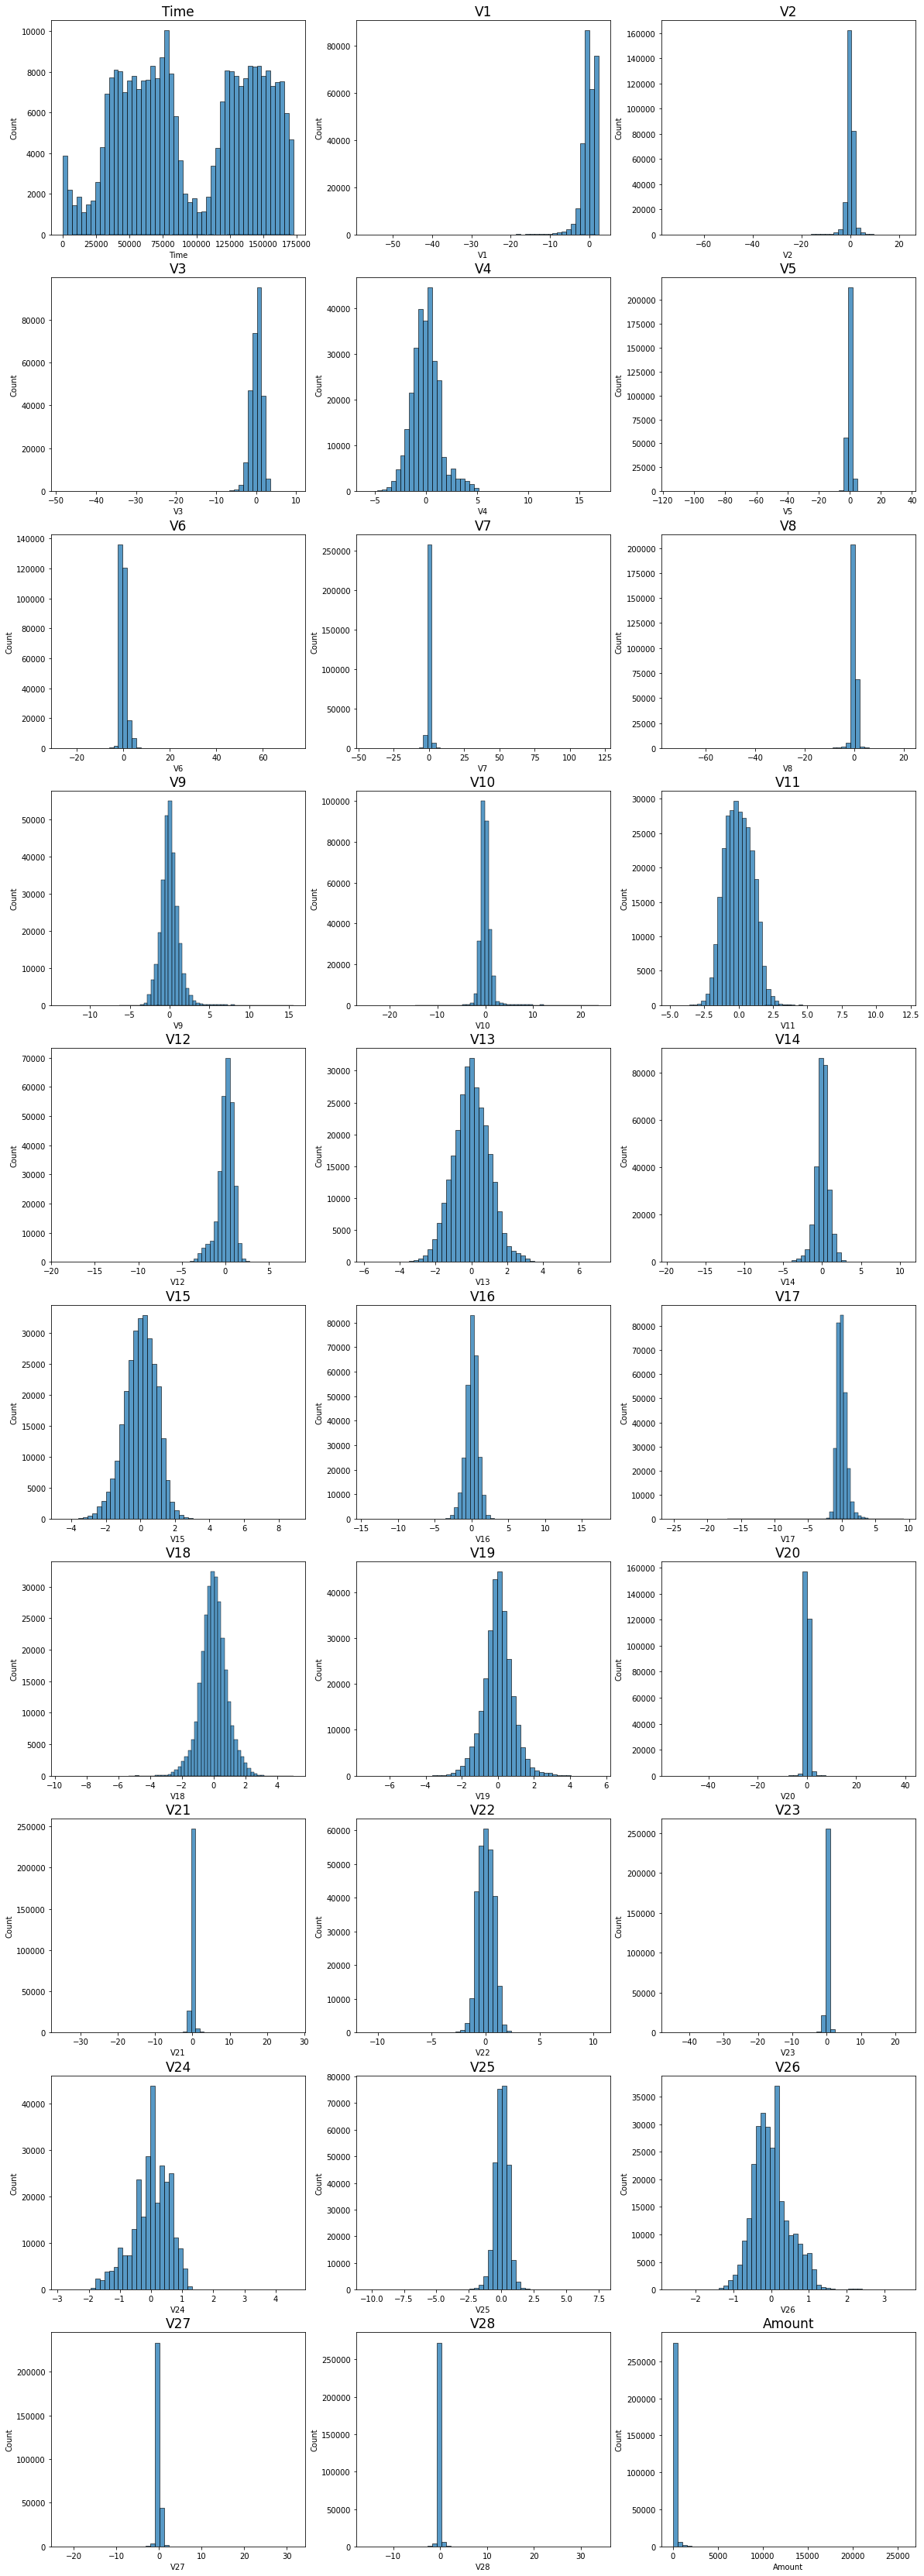

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(df[col][df.Class == 1], bins=50)
    sns.histplot(df[col][df.Class == 0], bins=50)
    plt.title(col, fontsize=17)
plt.show()

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df[['Time','Amount','Class']].groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                             Amount                                            \
            75%       max     count        mean         std  min   25%    50%   
Class                                                                           
0      139333.0  172792.0  284315.0   88.291022  250.105092  0.0  5.65  22.00   
1      128483.0  170348.0     492.0  122.211321  256.683288  0.0  1.00   9.25   

                         
          75%       max  
Class                    
0       77.05  25691.16  
1      105.89   2125.87

#### **Note :**
Looks like there is clear relationship between amount and Class. Averge of amount is high for the fraudelant transactions. Lets Do further analysis to understand more

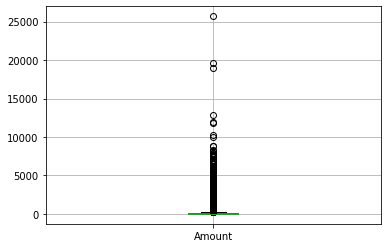

In [ ]:
df.boxplot('Amount')

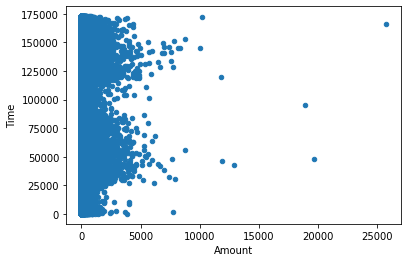

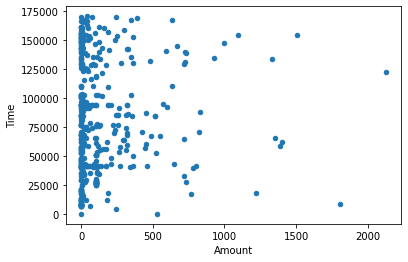

In [ ]:
df[df.Class == 0].plot.scatter('Amount','Time')
df[df.Class == 1].plot.scatter('Amount','Time')

In [ ]:
# There are 7 record in dataset the Ammount is greater than 10,000.00. 
# with scatterplot we can see all of these transactions are belongs to non-fraudelent as well
df = df.drop(df[df.Amount > 10000].index, axis=0)

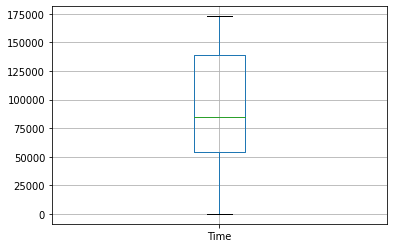

In [ ]:
df.boxplot('Time')

In [ ]:
X = df.drop('Class', axis=1)
y = df.Class.values

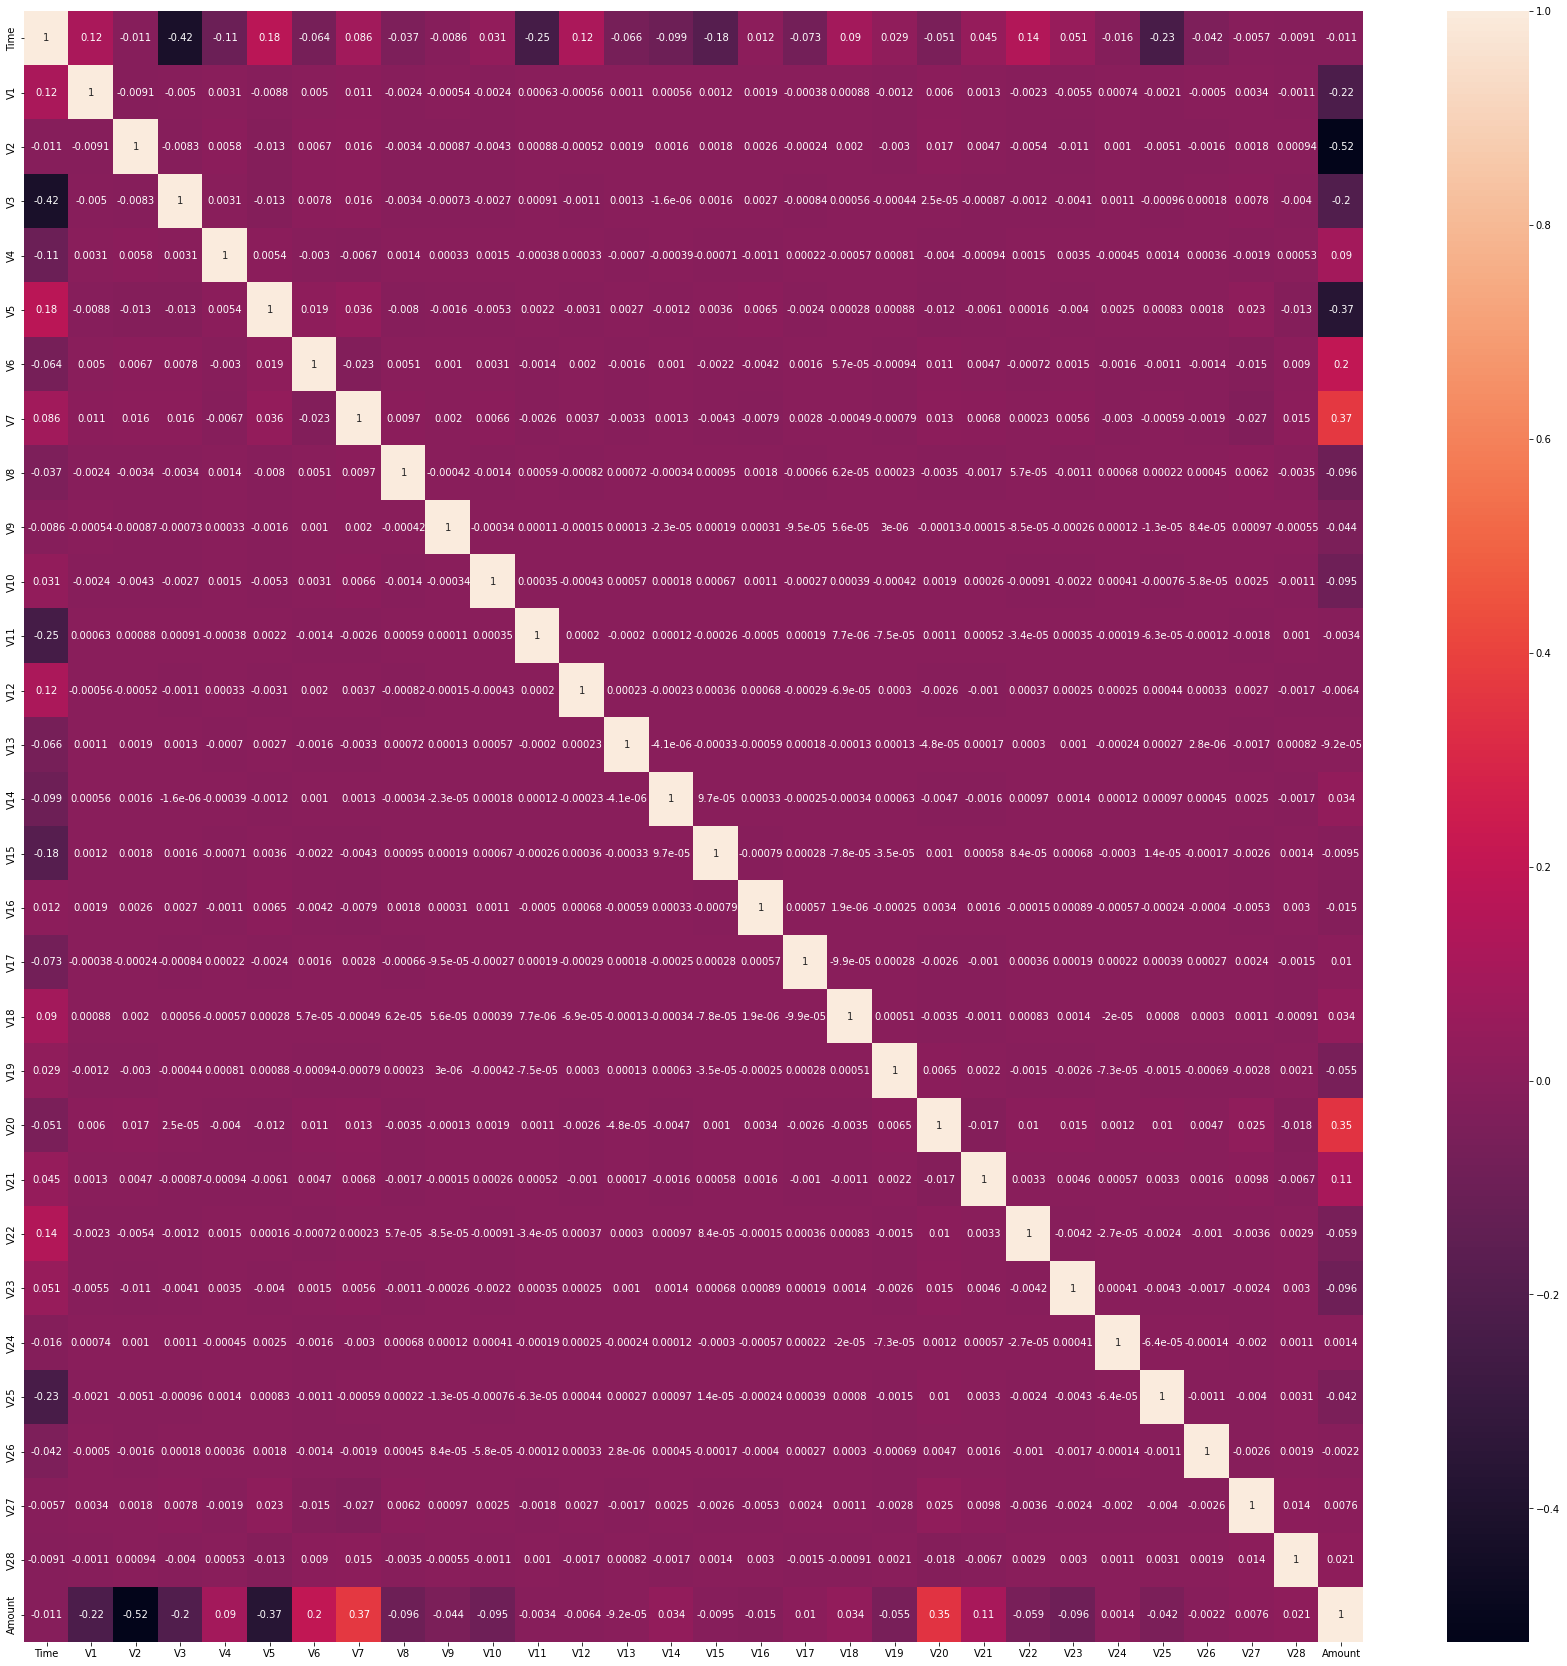

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
# Handling Inbalance data.
counts = df.Class.value_counts()
print(counts)
print(f'legimate {(counts[0] / sum(counts))*100}% and Fraudent {(counts[1] / sum(counts))*100}%')

0    284308
1       492
Name: Class, dtype: int64
legimate 99.82724719101124% and Fraudent 0.17275280898876405%


# **Preprocessing**

## **Feature Selection**

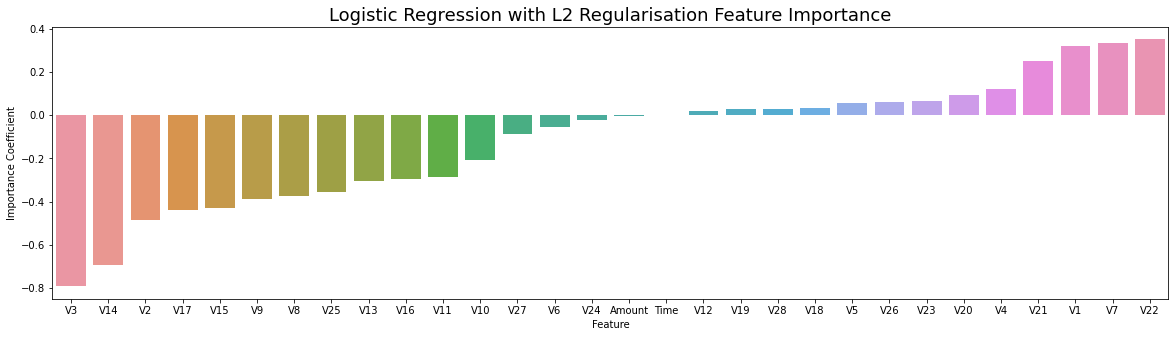

In [ ]:
reg_model = LogisticRegression(max_iter=200,random_state=12, solver='liblinear')
reg_model.fit(X,y)

# coefficient matrix
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(reg_model.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']
coefficients.sort_values(by='Importance Coefficient', inplace=True)

# Plotting coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

There are no sifnificant with ammount and time with class as expected. lets remove those columns

In [ ]:
X.drop(['Time','Amount'], axis=1, inplace=True)

**Summary of EDA**
- Data looks clean
- No null values
- Majority of features are well distributed around mean
- There are some corereated features. but not strong enough to drop
- Dataset is highly imbalanced.

**Resampling stratergy**
Dataset is highly imbalanced. Fraudulent transactions are only 0.17% from entire dataset. Direct oversampling or under sampling will not work for the dataset. Lest do mix of oversampling and under sampling to cover more data points from none-fraudulent than taking just 492 records out of 284308 samples.

1. Lets take random 5% from none-fraudulent transactions
2. Then will oversample fraudulent transactions to match with none-fraudulen

## **Resampling**

In [ ]:
# Since dataset is highly unbalanced we can use under sampling or mix of under and over sampling to increase number of samples
leg_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

no_of_samples = round(leg_df.shape[0] * 0.05)
no_of_samples

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

leg_df_2 = resample(leg_df, n_samples=no_of_samples, random_state=15)
# leg_df_2.describe()
df_sampled = pd.concat([leg_df_2,fraud_df],axis=0)

x_sampled = df_sampled.drop('Class', axis=1)
y_sampled = df_sampled.Class

ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(x_sampled, y_sampled)

In [ ]:
y.value_counts()

0    14215
1    14215
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)
y_train.value_counts(), y_test.value_counts()

(0    10661
 1    10661
 Name: Class, dtype: int64, 1    3554
 0    3554
 Name: Class, dtype: int64)

**Defining Evaluation criteria**

In [ ]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score


In [ ]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
    # save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [ ]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

In [ ]:
# Model

# Logistic Regression
# Logistic Regression CV
# Bernoulli Naive Bayes Classifier
# RandomForestClassifier
# BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
# XGBClassifier
# import tensorflow as tf

# **Train Model and Metrics Evaluating**

## **Model selection**

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_sm, test_size = 0.2, random_state = 0)

In [ ]:
# Define classier to a list
classifiers = [
    LogisticRegression(),        #1
    LogisticRegressionCV(),      #2
    RidgeClassifierCV(),         #14
    SVC(),                       #3
    KNeighborsClassifier(),      #4

    DecisionTreeClassifier(),    #5
    RandomForestClassifier(),    #6
    AdaBoostClassifier(),        #7
    ExtraTreesClassifier(),      #8
    GradientBoostingClassifier(),#9 
    BaggingClassifier(),         #10
    XGBClassifier(),             #11

    GaussianNB(),                #12
    BernoulliNB()                #13
    ]

In [ ]:
# Train data for each model
# Create dataframe for model performance result
model_performance = pd.DataFrame(columns=['Method', 'accuracy', 'precision', 'recall', 'f1-score'])

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    method = str(type(classifier)).split('.')[-1][:-2]

    # accuracy score
    acc = accuracy_score(y_test, y_pred)

    # precision score
    pre = precision_score(y_test, y_pred)

    # recall score
    re = recall_score(y_test, y_pred)

    # f1 score
    f1 = f1_score(y_test, y_pred)

    # Append model performance metrics to dataframe
    # evaluation_df = evaluation_df.append({
    model_performance = model_performance.append({
                    'Method':method,
                    'accuracy':acc,
                    'precision':pre,
                    'recall':re,
                    'f1-score':f1}, ignore_index=True)

In [ ]:
# Sort accuracy, precision, recall, and f2-score in descending order
model_performance.sort_values(['accuracy', 'precision', 'recall', 'f1-score'], ascending=False).reset_index(drop=True)

,Method,accuracy,precision,recall,f1-score
0,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
1,ExtraTreesClassifier,1.000000,1.000000,1.000000,1.000000
2,BaggingClassifier,0.998452,0.996914,1.000000,0.998455
3,DecisionTreeClassifier,0.996624,0.993292,1.000000,0.996635
4,XGBClassifier,0.993106,0.991034,0.995217,0.993121
5,GradientBoostingClassifier,0.991559,0.989905,0.993247,0.991573
6,AdaBoostClassifier,0.965532,0.980540,0.949916,0.964985
7,KNeighborsClassifier,0.958075,0.922638,1.000000,0.959762
8,LogisticRegressionCV,0.945132,0.970273,0.918402,0.943625
9,LogisticRegression,0.939645,0.965723,0.911649,0.937907


### **Logistic Regression**

Logistic Regression
--------------------------------------------------------------------------
accuracy score :0.9396454698930782
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3554
           1       0.97      0.91      0.94      3554

    accuracy                           0.94      7108
   macro avg       0.94      0.94      0.94      7108
weighted avg       0.94      0.94      0.94      7108



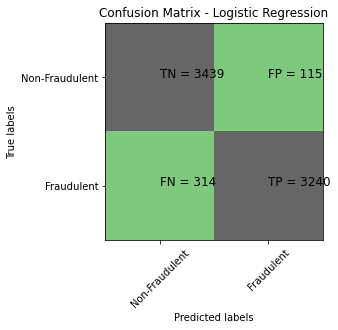

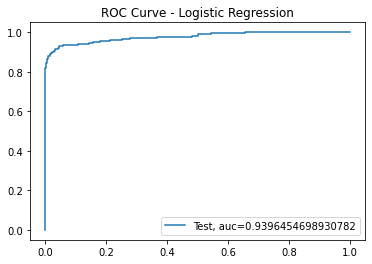

In [ ]:
lr_model = LogisticRegression(max_iter=200,random_state=12)
lr_model.fit(X_train,y_train)
pred1 = lr_model.predict(X_test)
prob1 = lr_model.predict_proba(X_test)
print_results("Logistic Regression", y_test, pred1,prob1[:,-1])

Logistic Regression CV
--------------------------------------------------------------------------
accuracy score :0.9424592009003939
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3554
           1       0.98      0.91      0.94      3554

    accuracy                           0.94      7108
   macro avg       0.94      0.94      0.94      7108
weighted avg       0.94      0.94      0.94      7108



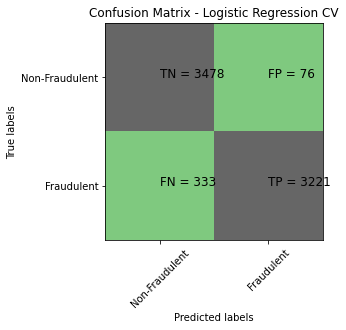

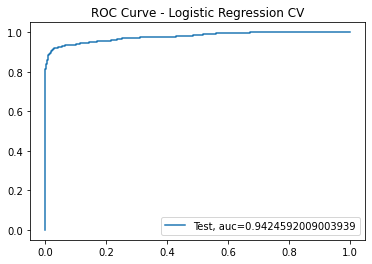

In [ ]:
cv_num = KFold(n_splits=10, shuffle=True, random_state=12)
lr_modelCV = LogisticRegressionCV(max_iter=200,penalty='l2',scoring='roc_auc',cv=cv_num,tol=10,random_state=12)
lr_modelCV.fit(X_train,y_train)
pred2 = lr_modelCV.predict(X_test)
prob2 = lr_modelCV.predict_proba(X_test)
print_results("Logistic Regression CV", y_test, pred2,prob2[:,-1])

### **Logistic Regression CV**

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301


### **Bernoulli Naive Bayes Classifier**

Bernoulli Naive Bayes
--------------------------------------------------------------------------
accuracy score :0.9006752954417557
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3554
           1       0.99      0.81      0.89      3554

    accuracy                           0.90      7108
   macro avg       0.91      0.90      0.90      7108
weighted avg       0.91      0.90      0.90      7108



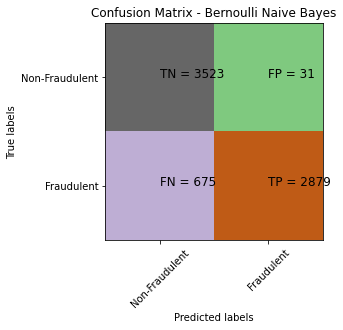

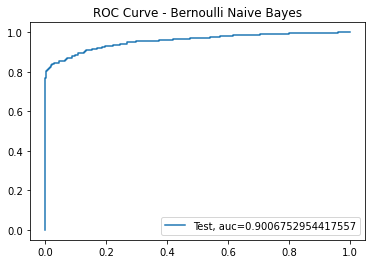

In [ ]:
gnb_model = BernoulliNB()
gnb_model.fit(X_train,y_train)
pred3 = gnb_model.predict(X_test)
prob3 = gnb_model.predict_proba(X_test)
print_results("Bernoulli Naive Bayes", y_test, pred3,prob3[:,-1])

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780


### **Random Forest Classifier**

Random Forest Classifier + gini
--------------------------------------------------------------------------
accuracy score :1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



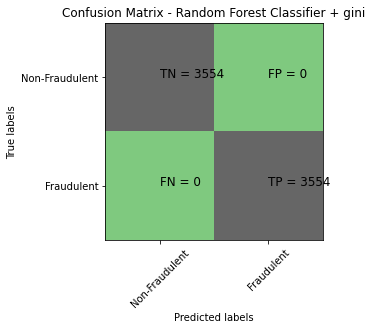

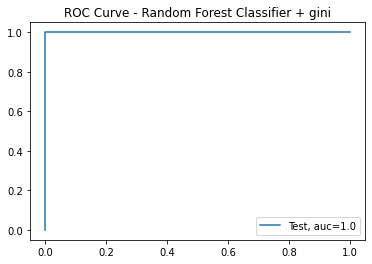

Random Forest Classifier + entropy 
--------------------------------------------------------------------------
accuracy score :1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



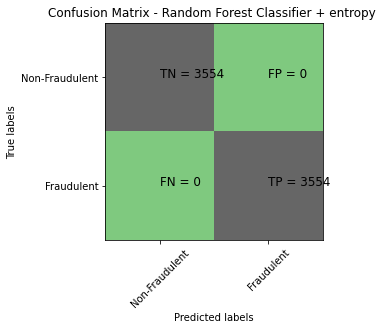

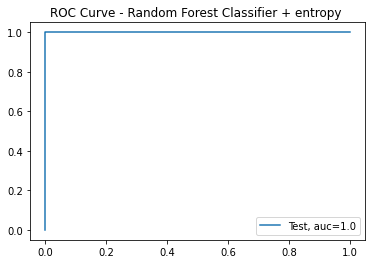

In [ ]:
rfc_model = RandomForestClassifier(bootstrap = True,
                                max_features = 'sqrt', random_state=12)
rfc_model.fit(X_train,y_train)
pred5 = rfc_model.predict(X_test)
prob5 = rfc_model.predict_proba(X_test)
print_results("Random Forest Classifier + gini", y_test, pred5,prob5[:,-1])

rfc_model2 = RandomForestClassifier(bootstrap = True,criterion='entropy',max_features = 'sqrt', random_state=12)
rfc_model2.fit(X_train,y_train)
pred6 = rfc_model2.predict(X_test)
prob6 = rfc_model2.predict_proba(X_test)
print_results("Random Forest Classifier + entropy ", y_test, pred6,prob6[:,-1])

### **Bagging Classifier**

Bagging Classifier
--------------------------------------------------------------------------
accuracy score :0.9998593134496342
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



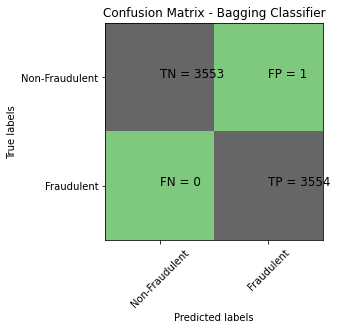

In [ ]:
bcf_model = BaggingClassifier(DecisionTreeClassifier(),
                              n_estimators=200,
                              max_samples=0.8,
                              max_features=0.8,
                              oob_score=True,
                              random_state=12)
bcf_model.fit(X_train,y_train)
pred2 = bcf_model.predict(X_test)
print_results("Bagging Classifier", y_test, pred2)

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Bagging Classifier,0.999859,0.999719,1.000000,0.999859


### **GradientBoosting Classifier** 

Gradient Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.9929656724817107
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3554
           1       0.99      1.00      0.99      3554

    accuracy                           0.99      7108
   macro avg       0.99      0.99      0.99      7108
weighted avg       0.99      0.99      0.99      7108



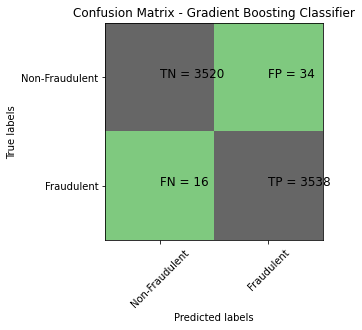

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
pred = gbc_model.predict(X_test)
pred_prob = gbc_model.predict_proba(X_test)
print_results("Gradient Boosting Classifier", y_test, pred)

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Bagging Classifier,0.999859,0.999719,1.000000,0.999859
6,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983


### **XGBOOSTING Classifier**

Gradient Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.9929656724817107
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3554
           1       0.99      1.00      0.99      3554

    accuracy                           0.99      7108
   macro avg       0.99      0.99      0.99      7108
weighted avg       0.99      0.99      0.99      7108



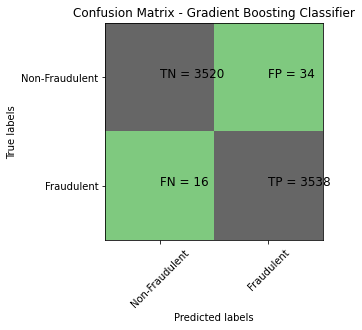

In [ ]:
cv = KFold(n_splits=10, random_state=12, shuffle=True)
model = XGBClassifier(cv=cv,learning_rate=0.01)

gbc_model.fit(X_train,y_train)
pred = gbc_model.predict(X_test)
pred_prob = gbc_model.predict_proba(X_test)
print_results("Gradient Boosting Classifier", y_test, pred)

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Bagging Classifier,0.999859,0.999719,1.000000,0.999859
6,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
7,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983


### **Artificial Neural Network Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape=[30]))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))

    model.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = create_model()
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
early_stopping = EarlyStopping(patience = 20, min_delta = 0.001, restore_best_weights =True )

In [ ]:
scaller = StandardScaler()

x_train_scaled = scaller.fit_transform(X_train)
x_test_scaled = scaller.transform(X_test)

In [ ]:
history  = classifier.fit(x_train_scaled,
                          y_train,
                          epochs=500,
                          validation_split=0.25,
                          callbacks=[early_stopping],
                          verbose=1)

Epoch 1/500
500/500 [==============================] - 5s 8ms/step - loss: 0.1561 - accuracy: 0.9463 - val_loss: 0.1109 - val_accuracy: 0.9599
Epoch 2/500
500/500 [==============================] - 5s 10ms/step - loss: 0.0808 - accuracy: 0.9692 - val_loss: 0.0584 - val_accuracy: 0.9792
Epoch 3/500
500/500 [==============================] - 5s 10ms/step - loss: 0.0539 - accuracy: 0.9809 - val_loss: 0.0344 - val_accuracy: 0.9904
Epoch 4/500
500/500 [==============================] - 6s 12ms/step - loss: 0.0396 - accuracy: 0.9860 - val_loss: 0.0302 - val_accuracy: 0.9893
Epoch 5/500
500/500 [==============================] - 3s 6ms/step - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.0258 - val_accuracy: 0.9912
Epoch 6/500
500/500 [==============================] - 2s 5ms/step - loss: 0.0226 - accuracy: 0.9916 - val_loss: 0.0210 - val_accuracy: 0.9940
Epoch 7/500
500/500 [==============================] - 2s 5ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0313 - val_accuracy: 0.9

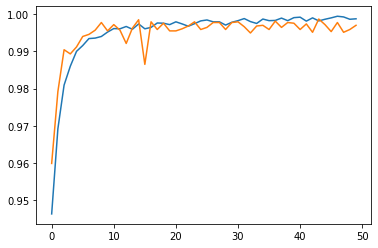

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
y_pred = classifier.predict(x_test_scaled)

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5 :
        y_pred[i] = 1
    else:
        y_pred[i] = 0

ANN 
--------------------------------------------------------------------------
accuracy score :0.9990151941474396
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3554
           1       1.00      1.00      1.00      3554

    accuracy                           1.00      7108
   macro avg       1.00      1.00      1.00      7108
weighted avg       1.00      1.00      1.00      7108



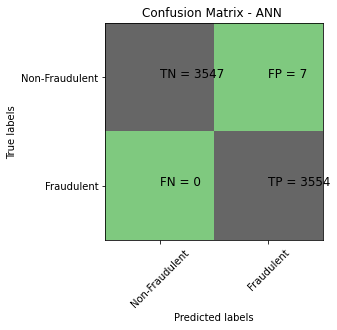

In [ ]:
print_results("ANN ", y_test, y_pred)

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.939645,0.965723,0.911649,0.937907
1,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
2,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
3,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
5,Bagging Classifier,0.999859,0.999719,1.000000,0.999859
6,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
7,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
8,ANN,0.999015,0.998034,1.000000,0.999016


## **Conclusion**
Accuracy and F1-Score for this Random Forest Classifier + gini and Random Forest Classifier + entropy is almost 1 %. its almost perfect and no need to finetune more. accuracy score,	Precision,	Recall,	f1_score near 1

In [ ]:
evaluation_df.sort_values(['accuracy score', ' Precision', 'Recall', 'f1_score'], ascending=False).reset_index(drop=True)

,Model,accuracy score,Precision,Recall,f1_score
0,Random Forest Classifier + gini,1.000000,1.000000,1.000000,1.000000
1,Random Forest Classifier + entropy,1.000000,1.000000,1.000000,1.000000
2,Bagging Classifier,0.999859,0.999719,1.000000,0.999859
3,ANN,0.999015,0.998034,1.000000,0.999016
4,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
5,Gradient Boosting Classifier,0.992966,0.990482,0.995498,0.992983
6,Logistic Regression CV,0.942459,0.976949,0.906303,0.940301
7,Logistic Regression,0.939645,0.965723,0.911649,0.937907
8,Bernoulli Naive Bayes,0.900675,0.989347,0.810073,0.890780
